In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.shape

(9800, 18)

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.drop(['Row ID','Customer ID', 'Customer Name', 'Product Name'], axis=1, inplace=True)

df.dropna(subset=['Postal Code'], inplace=True)

df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(9788, 14)

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
df = df[df['Ship Date'] >= df['Order Date']]
df = df[(df['Order Date'].dt.year >= 2015) & (df['Order Date'].dt.year <= 2018)]

**EDA**

In [ ]:
print(df.describe())

                          Order Date                      Ship Date  \
count                           9788                           9788   
mean   2017-05-01 04:40:42.174091008  2017-05-05 03:44:47.862688768   
min              2015-01-03 00:00:00            2015-01-07 00:00:00   
25%              2016-05-23 00:00:00            2016-05-27 00:00:00   
50%              2017-06-26 00:00:00            2017-06-29 00:00:00   
75%              2018-05-15 06:00:00            2018-05-19 06:00:00   
max              2018-12-30 00:00:00            2019-01-05 00:00:00   
std                              NaN                            NaN   

        Postal Code         Sales  
count   9788.000000   9788.000000  
mean   55274.552922    230.110956  
min     1040.000000      0.444000  
25%    23223.000000     17.248000  
50%    58103.000000     54.376000  
75%    90008.000000    210.104000  
max    99301.000000  22638.480000  
std    32042.628986    625.333809  



1.   Graphique : ventes par categorie


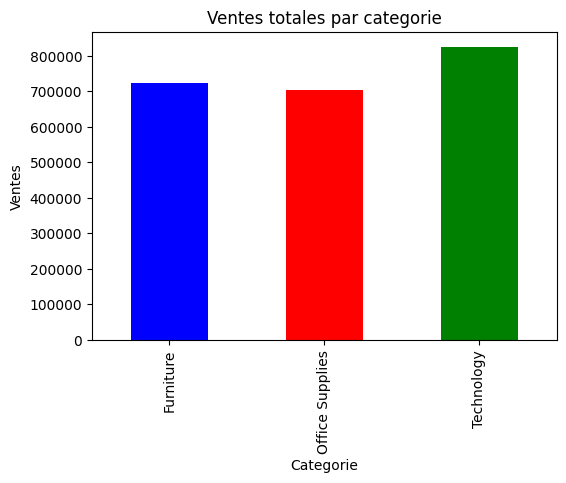

In [ ]:
ventes_par_cat = df.groupby('Category')['Sales'].sum()
colors = ['blue', 'red', 'green']
plt.figure(figsize=(6,4))
ventes_par_cat.plot(kind='bar', color=colors)
plt.title("Ventes totales par categorie")
plt.xlabel("Categorie")
plt.ylabel("Ventes")
plt.show()

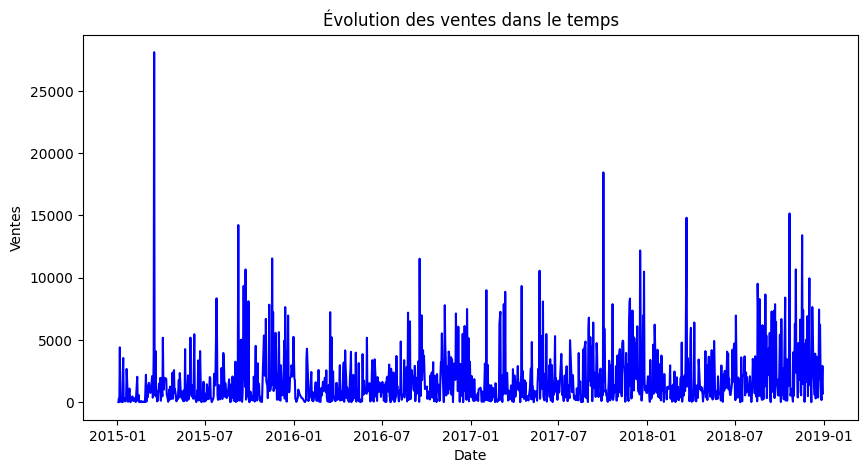

In [ ]:
ventes_par_date = df.groupby('Order Date')['Sales'].sum()
plt.figure(figsize=(10,5))
plt.plot(ventes_par_date.index, ventes_par_date.values, color='blue')
plt.title('Évolution des ventes dans le temps')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.show()

**Relation entre ventes et profits**

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [ ]:
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Day'] = df['Order Date'].dt.day

df['Order_DayOfWeek'] = df['Order Date'].dt.dayofweek

df['Ship_Year'] = df['Ship Date'].dt.year
df['Ship_Month'] = df['Ship Date'].dt.month

df['Shipping_Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

In [ ]:
!pip install xgboost shap

In [ ]:
# Target
y = df['Sales']

# Colonnes qu'on veut supprimer
cols_to_drop = ['Sales', 'Order ID', 'Order Date', 'Ship Date', 'Postal Code',
                'Product ID', 'Country', 'City', 'Customer Name']

# Garder seulement les colonnes qui existent dans df
cols_to_drop = [col for col in cols_to_drop if col in df.columns]

# Créer X
X = df.drop(columns=cols_to_drop)

print("Colonnes utilisées comme features :", X.columns.tolist())

Colonnes utilisées comme features : ['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category', 'Order_Year', 'Order_Month', 'Order_Day', 'Order_DayOfWeek', 'Ship_Year', 'Ship_Month', 'Shipping_Duration']


In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode']
for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col])


In [ ]:
# Vérifier les types
print(X.dtypes)

# Convertir tout ce qui reste en float ou int
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])


Ship Mode             int64
Segment               int64
State                object
Region                int64
Category              int64
Sub-Category          int64
Order_Year            int32
Order_Month           int32
Order_Day             int32
Order_DayOfWeek       int32
Ship_Year             int32
Ship_Month            int32
Shipping_Duration     int64
dtype: object


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-scores)
print("RMSE pour chaque fold :", rmse_scores)
print("RMSE moyen :", rmse_scores.mean())


RMSE pour chaque fold : [468.77907105 666.74219804 542.66338461 649.28746323 587.65563683]
RMSE moyen : 583.025550750491


In [ ]:
# Entraîner sur toutes les données
xgb_model.fit(X, y)

# Prédire sur les mêmes données ou sur de nouvelles données
y_pred = xgb_model.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"RMSE : {rmse:.2f}, MAE : {mae:.2f}, R2 : {r2:.2f}")

RMSE : 459.47, MAE : 188.37, R2 : 0.46


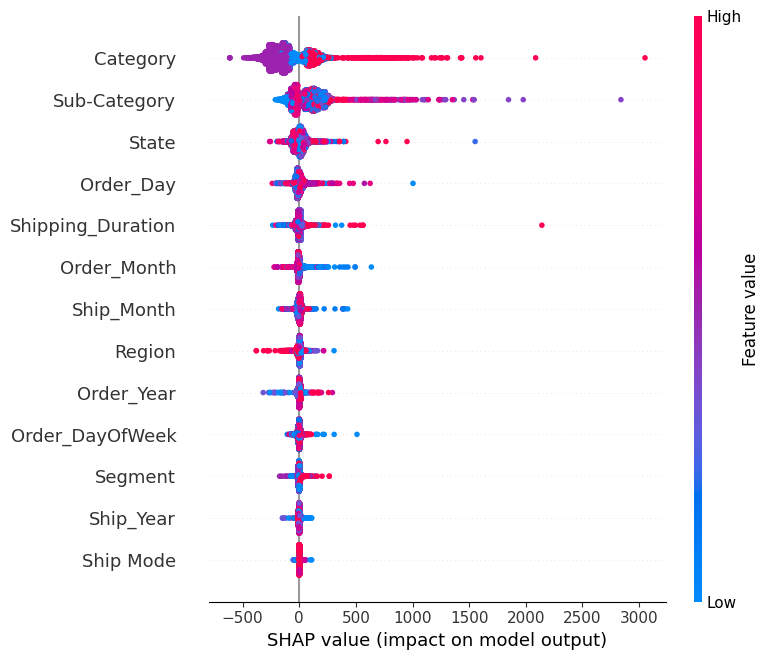

In [ ]:
import shap

# Créer l’explainer
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X)

# Afficher l’importance globale des features
shap.summary_plot(shap_values, X)